<a href="https://colab.research.google.com/github/kuldeepsharma110/BMW_Sales_Analysis/blob/main/BMW_car_sales_volume_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Data from kaggle**

In [4]:
# fetching data from kaggle
import kagglehub

# Download latest version
dir_path = kagglehub.dataset_download("ahmadrazakashif/bmw-worldwide-sales-records-20102024")

print("Path to dataset files:", dir_path)

import os
for file in os.listdir(dir_path):
  print(file)

# joining directory and file path
file_path = os.path.join(dir_path,file)

100%|██████████| 833k/833k [00:00<00:00, 1.72MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ahmadrazakashif/bmw-worldwide-sales-records-20102024/versions/1
BMW sales data (2010-2024) (1).csv


# Importing necessary Libraries

In [5]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Dataset Overview**

In [ ]:
df = pd.read_csv(file_path)

In [7]:
display(df.head())
display(df.tail())
display(df.info())
display(df.describe())
print(f"shape of data is {df.shape}")

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High
49999,X1,2020,North America,Blue,Diesel,Manual,3.3,171003,77492,1764,Low


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


None

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


shape of data is (50000, 11)


## **Insight**

1. Dataset is having 50,000 rows and 11 columns
2. There is no null value as null value count in all rows is 50,000.
3. Categorical data is in object and numerical data is in int and float so there is no need for dtype conversion
4.  There are 5 numerical columns

* From year column it is clear that data is from 2010 to 2024
* engine size is from 1.5l to 5l.
* non of BMW car sale is greater than 9999 in any year and least sale is of 100 units only.

# **Data Validation**

1. check null values
2. duplicate values
3. check datatypes
4. check required data as per objective(ex we are doing minute wise analysis and and data of certain time is missing.)
5. check value in each column (ex age can't be negative)


In [9]:
# check duplicate values present in dataset
df.duplicated().sum()

np.int64(0)

In [10]:
# check data set values if they require correction
for i in df.columns:
  print(sorted(df[i].unique()))

['3 Series', '5 Series', '7 Series', 'M3', 'M5', 'X1', 'X3', 'X5', 'X6', 'i3', 'i8']
[np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
['Africa', 'Asia', 'Europe', 'Middle East', 'North America', 'South America']
['Black', 'Blue', 'Grey', 'Red', 'Silver', 'White']
['Diesel', 'Electric', 'Hybrid', 'Petrol']
['Automatic', 'Manual']
[np.float64(1.5), np.float64(1.6), np.float64(1.7), np.float64(1.8), np.float64(1.9), np.float64(2.0), np.float64(2.1), np.float64(2.2), np.float64(2.3), np.float64(2.4), np.float64(2.5), np.float64(2.6), np.float64(2.7), np.float64(2.8), np.float64(2.9), np.float64(3.0), np.float64(3.1), np.float64(3.2), np.float64(3.3), np.float64(3.4), np.float64(3.5), np.float64(3.6), np.float64(3.7), np.float64(3.8), np.float64(3.9), np.float64(4.0), np.float64(4.1), np.float64(4.2), 

In [11]:
# seperating numerical column and catagorical column
cat_column=[]
num_column=[]
for i in df.columns:
  if df[i].dtype == object:
    cat_column.append(i)
  else:
    num_column.append(i)

print(f"categorical columns are {cat_column}")
print(f"Numerical columns are {num_column}")


categorical columns are ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Sales_Classification']
Numerical columns are ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']


In [12]:
# checking numerical values they are negative or not as in the dataset negative value doesnot make sense

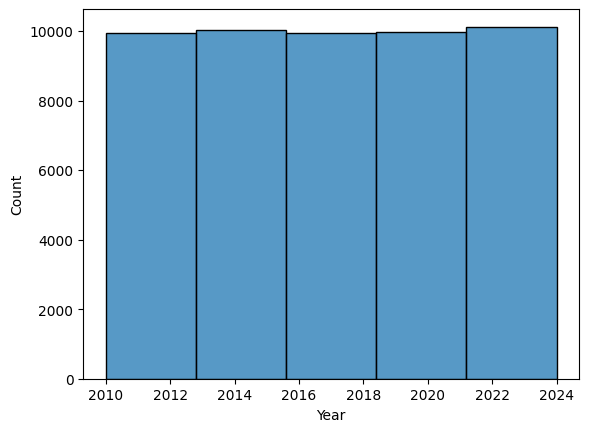

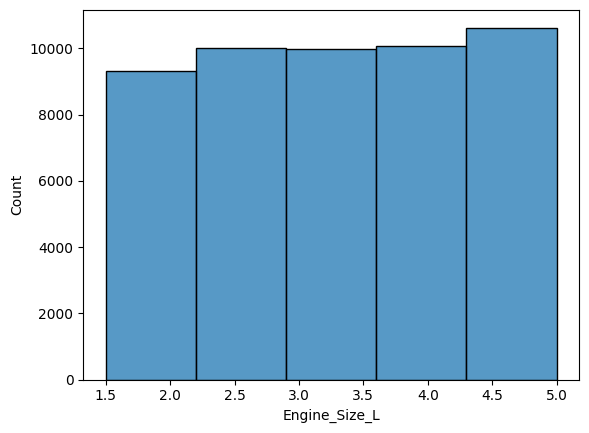

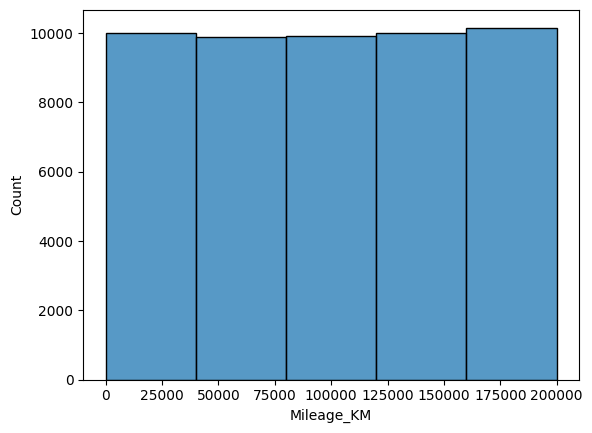

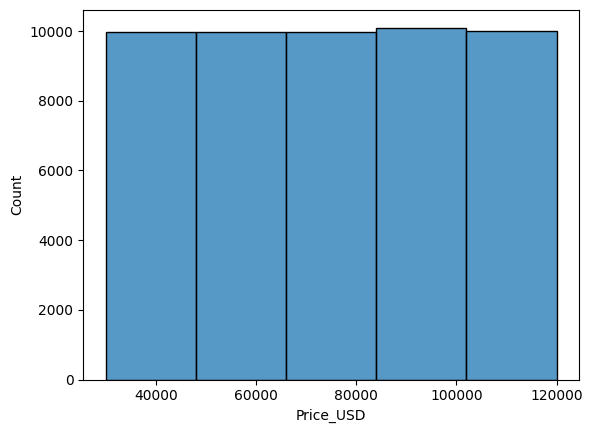

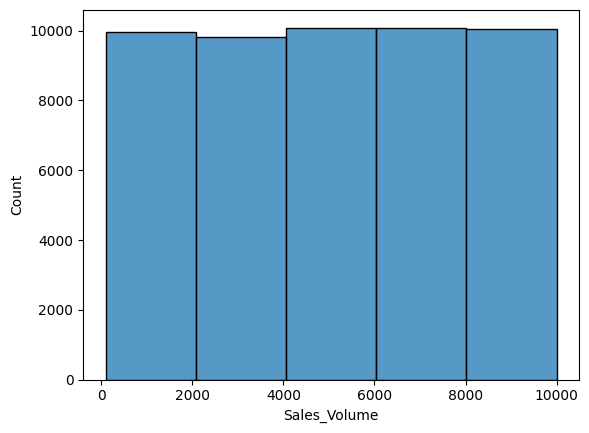

In [13]:
for i in num_column:
  sns.histplot(df,x=i, bins=5)
  plt.show()

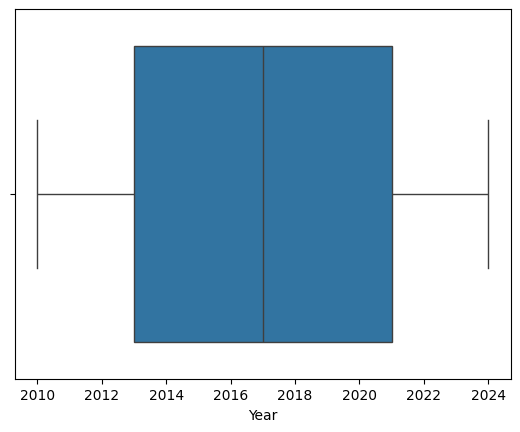

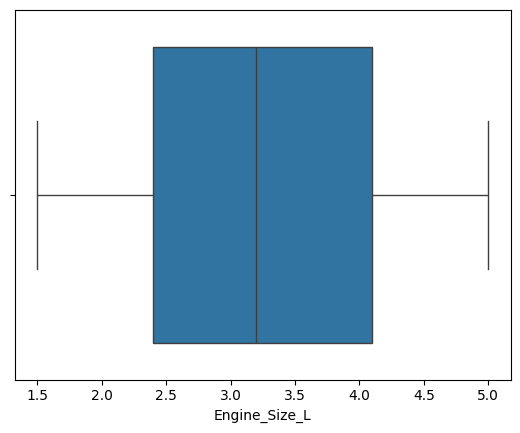

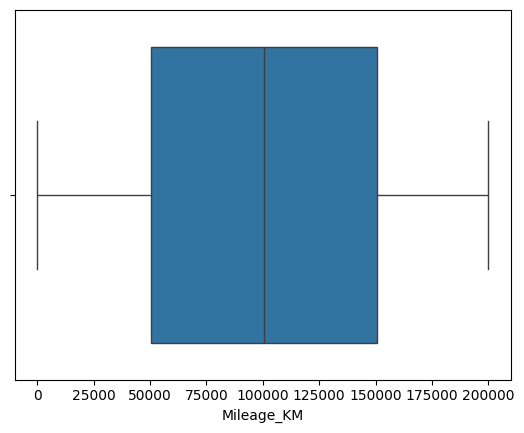

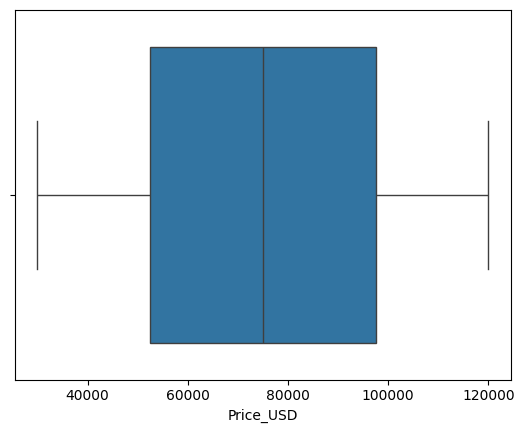

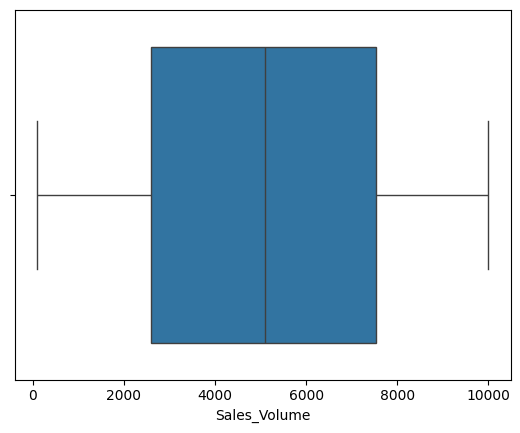

In [14]:
# checking outlier in my dataset
for i in num_column:
  sns.boxplot(df,x=i)
  plt.show()

## **Insights**

1. There is no duplicated values in the dataset.
2. All the values in the catagorical column are in proper format.
3. All numerical values are positive.
4. Their is no outlier in the numerical data seen from box plot.

# Feature Engineering
**From the above analysis it is seen that mileage column has no relatonship with the other columns due to this we will drop this column**

In [16]:
df=df.drop(columns=['Mileage_KM'])


In [17]:
display(df)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,58566,9486,High


# **Now my data is ready for Analysis**

# Univariate analysis

# catagorical columns

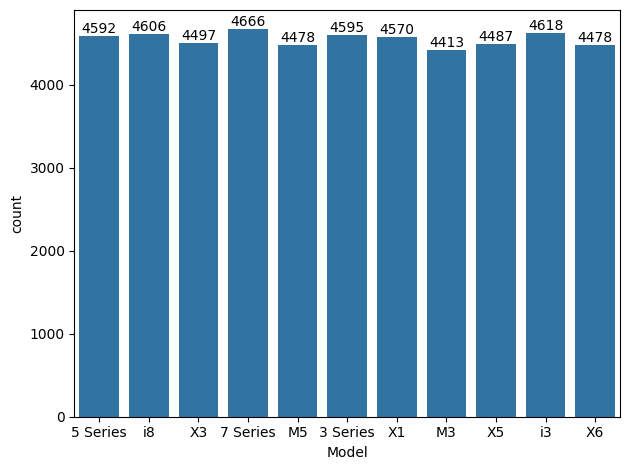

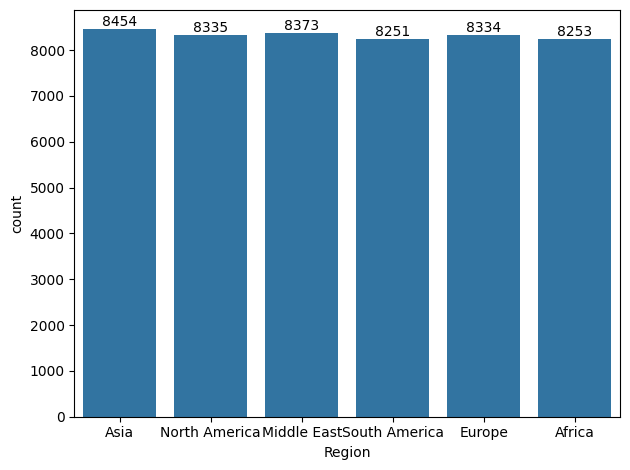

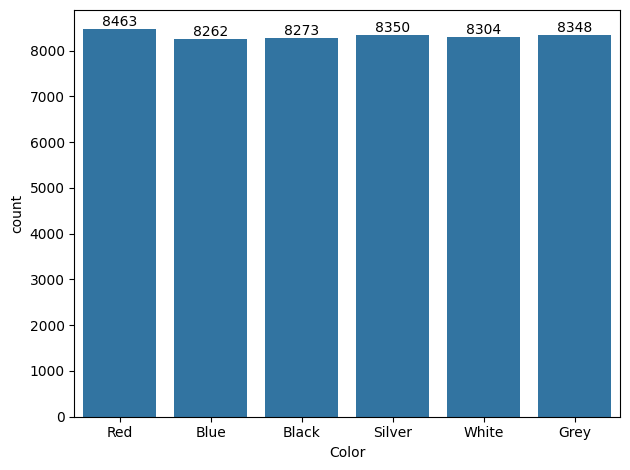

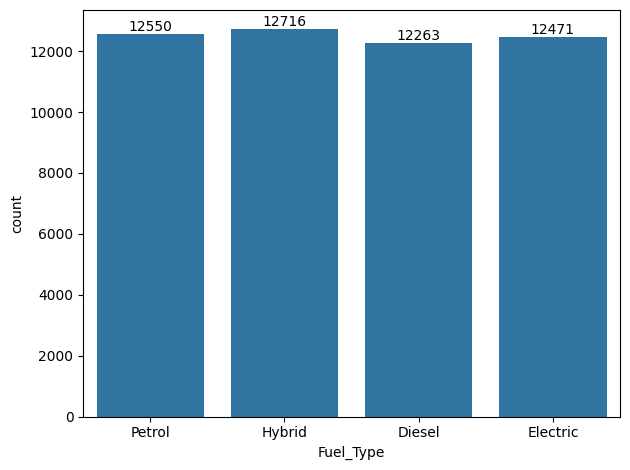

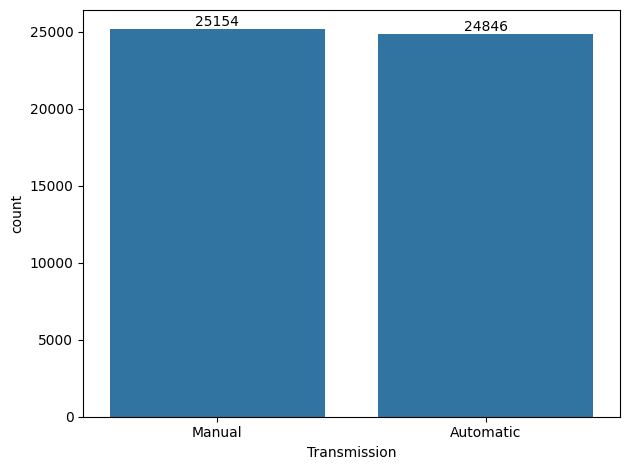

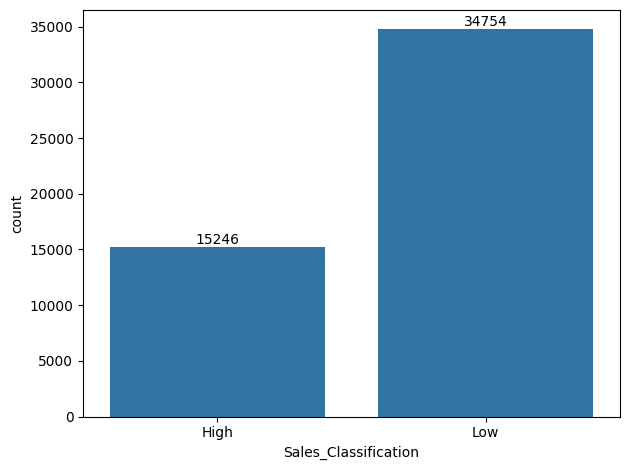

In [18]:
for i in cat_column:
  #df[i].value_counts().plot(kind="bar",label=True)

  ax=sns.countplot(x=df[i])
  for cont in ax.containers:
      ax.bar_label(cont)
  plt.tight_layout()
  plt.show()


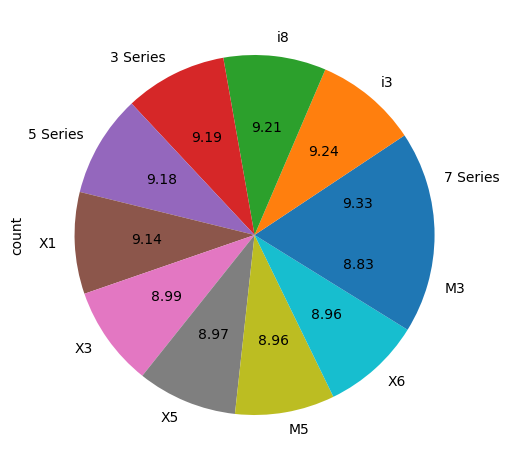

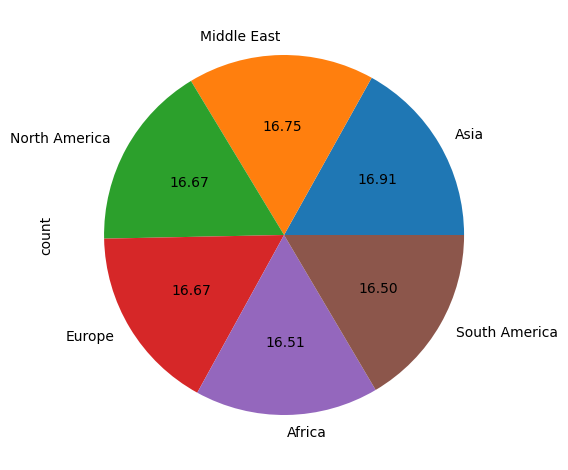

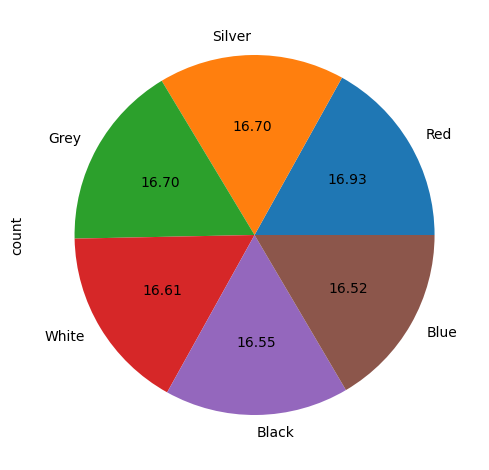

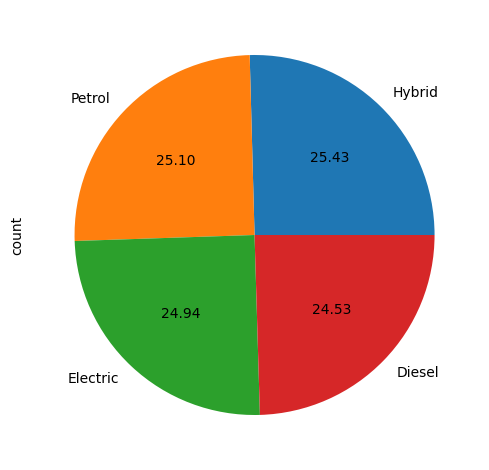

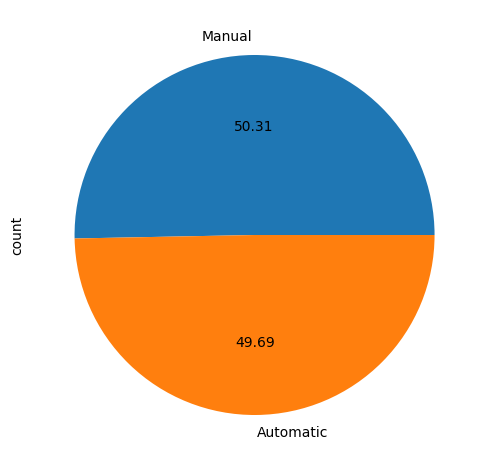

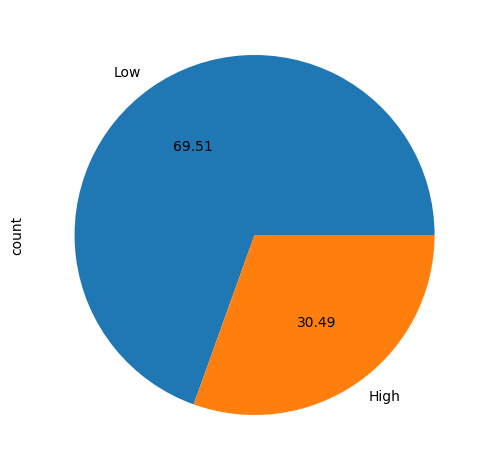

In [19]:
for i in cat_column:
  df[i].value_counts().plot(kind="pie",autopct="%.2f")

  # ax=sns.countplot(x=df[i])
  # for cont in ax.containers:
  #     ax.bar_label(cont)
  plt.tight_layout()
  plt.show()

## Insight
1. Dataset is uniformly distributed based on all the categorical columns.


# Univarite analysis on numerical columns

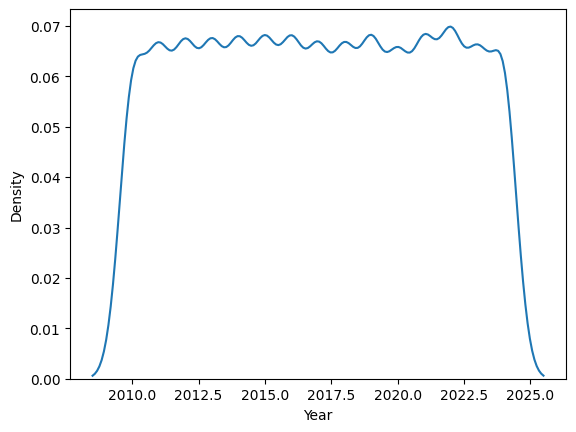

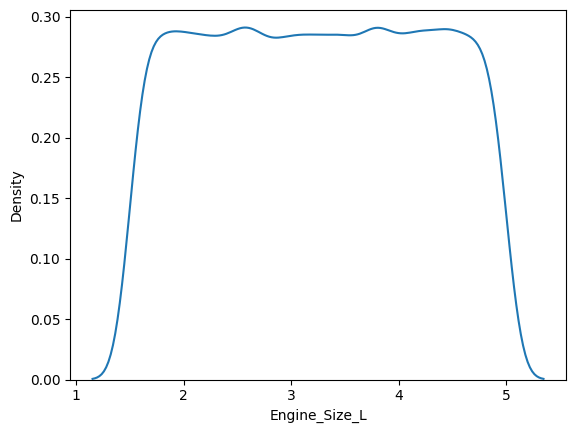

'Mileage_KM'


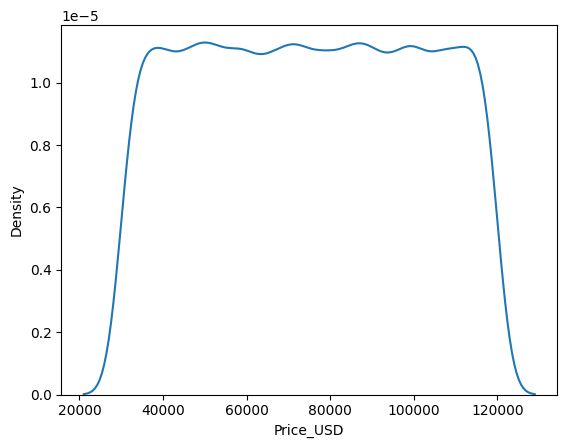

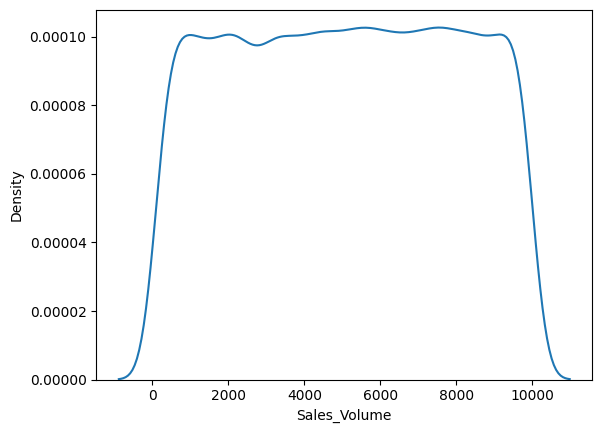

In [20]:
for i in num_column:
  try:
    sns.kdeplot(x=df[i])
    plt.show()
  except Exception as e:
    print(e)


##**Insight**
1. We have choosen kde plot to check the density of value in particular region.
2. It is showing uniform distribution for all the numerical column.

# Bivariate and Multivariate analysis

## model vs sales

In [21]:
df.groupby("Model").agg({"Sales_Volume":"mean"})

,Sales_Volume
Model,
3 Series,5066.660065
5 Series,5029.947517
7 Series,5097.828118
M3,5064.512576
M5,5087.022778
X1,5121.676149
X3,5057.933956
X5,5061.232226
X6,5060.738276


/tmp/ipython-input-3413693342.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(df,x="Model",y="Sales_Volume",estimator=sum,ci=None)


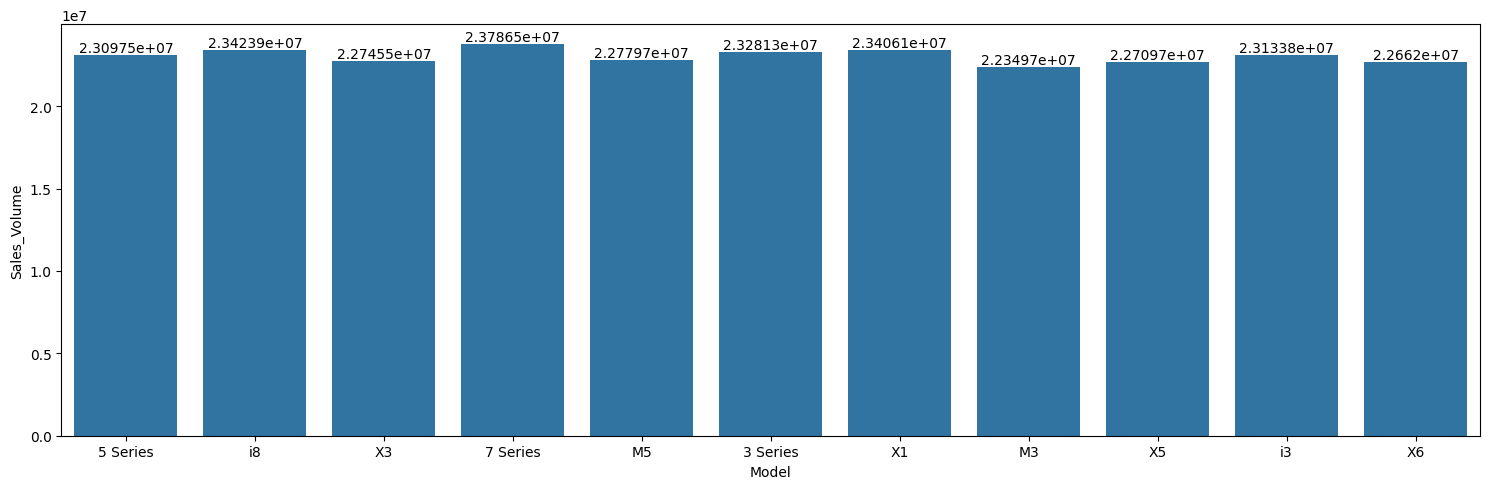

In [22]:
plt.figure(figsize=(15,5))
ax=sns.barplot(df,x="Model",y="Sales_Volume",estimator=sum,ci=None)

for con in ax.containers:
  ax.bar_label(con)
plt.tight_layout()
plt.show()

**Insight**

1. **Across all year sale is approxmitaly same for all models.**

/tmp/ipython-input-3890815095.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(df,x="Model",y="Sales_Volume",estimator=np.average,ci=None,hue="Transmission")


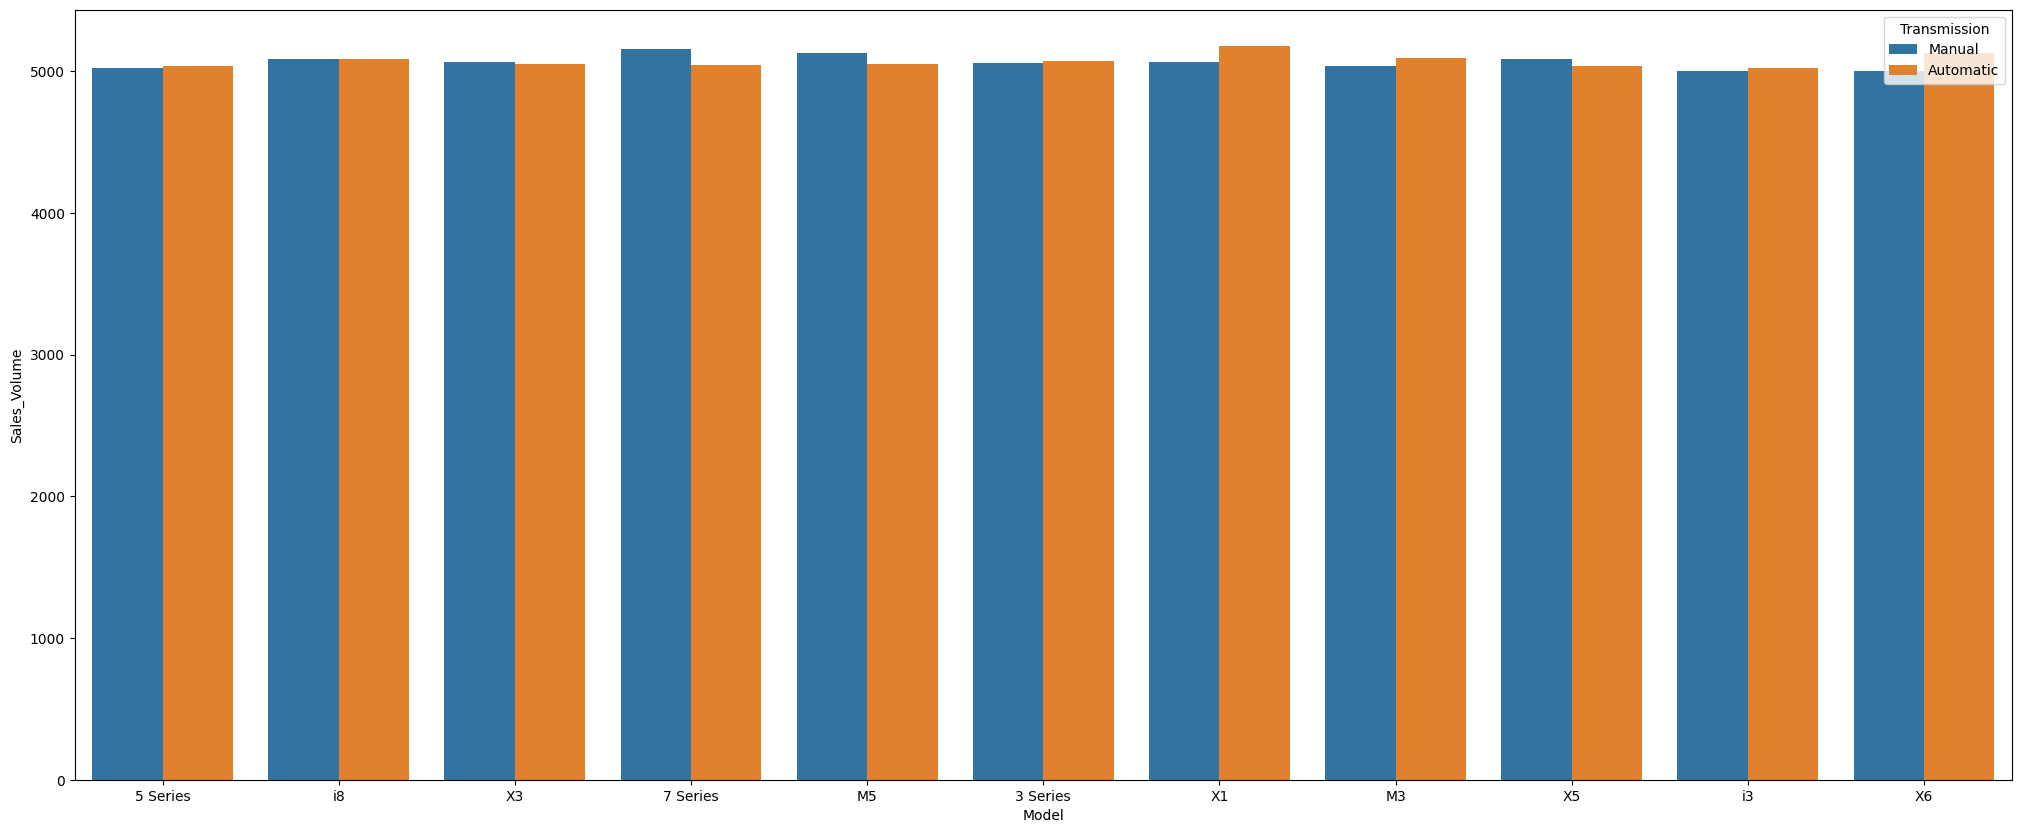

In [56]:
plt.figure(figsize=(25,10))
ax=sns.barplot(df,x="Model",y="Sales_Volume",estimator=np.average,ci=None,hue="Transmission")

**Insight**
1. Demand for automatic and manual transmission is same in all models

## check year wise trend of sales volume

/tmp/ipython-input-3455415868.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(df, x="Year",y="Sales_Volume", estimator=sum, ci=None)


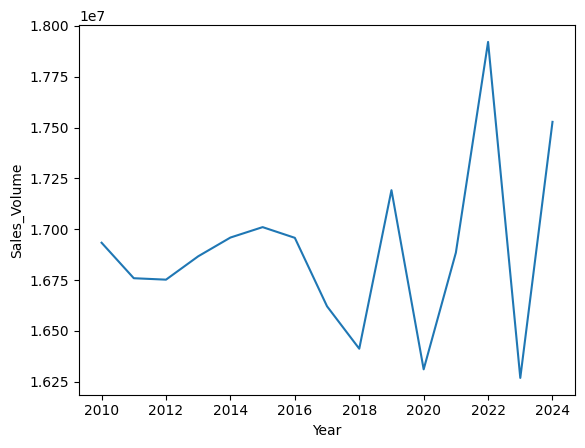

In [25]:
sns.lineplot(df, x="Year",y="Sales_Volume", estimator=sum, ci=None)
plt.show()

**Insights**

1. There is too much fluctuation after 2018 in sales volume.
2. In 2022 sales is max.


## Region wise sales.

,Region,Sales_Volume
0,Africa,41565252
1,Asia,42974277
2,Europe,42555138
3,Middle East,42326620
4,North America,42402629
5,South America,41551818


([<matplotlib.patches.Wedge at 0x7e1100735670>,
 [Text(0.9571239170482149, 0.5421381811072543, 'Africa'),
  Text(0.007952274748354516, 1.099971254772745, 'Asia'),
  Text(-0.9559368564110156, 0.5442285609512106, 'Europe'),
  Text(-0.9463550248704029, -0.5607246801261198, 'Middle East'),
  Text(0.01611638936841057, -1.0998819309333734, 'North America'),
  Text(0.9572146713776288, -0.5419779265795039, 'South America')],
 [Text(0.522067591117208, 0.2957117351494114, '16.40'),
  Text(0.004337604408193372, 0.5999843207851335, '16.96'),
  Text(-0.5214201034969176, 0.29685194233702394, '16.80'),
  Text(-0.5161936499293106, -0.305849825523338, '16.71'),
  Text(0.008790757837314856, -0.5999355986909308, '16.74'),
  Text(0.5221170934787066, -0.2956243235888203, '16.40')])

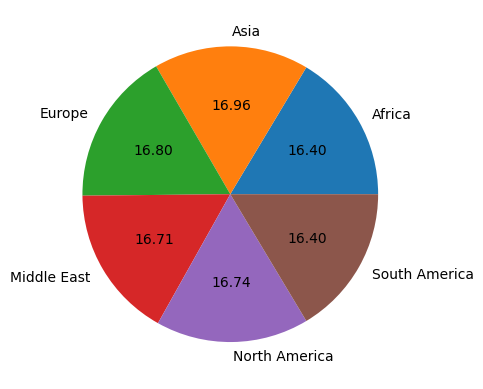

In [40]:
df_region=df.groupby("Region").agg({"Sales_Volume":"sum"}).reset_index()
# region_df.ndim
display(df_region)
plt.pie(x=df_region["Sales_Volume"],labels=df_region["Region"],autopct="%.2f")

## **Sales_Volume is same across all region. We are choosing Asia for our analysis because it is our continent.**

In [41]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Price_USD', 'Sales_Volume', 'Sales_Classification'],
      dtype='object')

In [78]:
asia_df=df[df["Region"]=="Asia"].sort_values(by="Sales_Volume",ascending=False)
display(asia_df)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Price_USD,Sales_Volume,Sales_Classification
43582,X5,2013,Asia,Blue,Diesel,Manual,2.4,115415,9998,High
38187,i8,2013,Asia,Blue,Hybrid,Manual,4.1,90948,9997,High
31010,X5,2014,Asia,Blue,Petrol,Automatic,3.4,111286,9994,High
7782,M3,2024,Asia,Silver,Electric,Automatic,2.3,65928,9993,High
27163,3 Series,2021,Asia,Silver,Electric,Manual,3.3,75260,9992,High
...,...,...,...,...,...,...,...,...,...,...
45596,7 Series,2013,Asia,Black,Hybrid,Manual,1.5,70660,111,Low
14925,X6,2011,Asia,White,Petrol,Automatic,2.2,81566,109,Low
7202,3 Series,2012,Asia,Black,Hybrid,Manual,4.2,106119,108,Low
15604,X5,2024,Asia,Silver,Petrol,Automatic,3.4,103080,107,Low


**which model has lowest sales volume in asia**

<Axes: xlabel='Model', ylabel='Sales_Volume'>

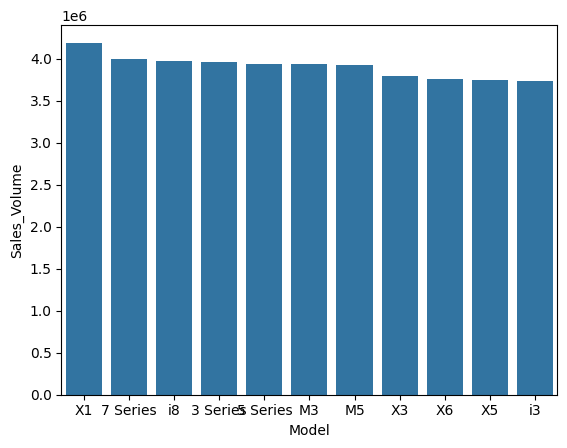

In [85]:
sns.barplot(asia_df.groupby("Model").agg({"Sales_Volume":"sum"}).reset_index().sort_values(by = "Sales_Volume",ascending=False), x="Model", y="Sales_Volume",estimator="sum")

In [88]:
# i3 model is have less sales volume.
asia_i3_df=asia_df[asia_df["Model"]=="i3"]
display(asia_i3_df)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Price_USD,Sales_Volume,Sales_Classification
37764,i3,2011,Asia,Grey,Electric,Manual,4.3,31013,9975,High
16110,i3,2024,Asia,Black,Diesel,Automatic,2.4,50881,9965,High
2584,i3,2016,Asia,Red,Electric,Automatic,1.9,78163,9964,High
43743,i3,2015,Asia,White,Diesel,Manual,3.1,111005,9939,High
39897,i3,2010,Asia,Grey,Petrol,Automatic,1.5,46909,9937,High
...,...,...,...,...,...,...,...,...,...,...
44140,i3,2015,Asia,Silver,Diesel,Automatic,4.0,65479,177,Low
10997,i3,2018,Asia,White,Petrol,Automatic,3.5,76968,158,Low
32652,i3,2020,Asia,Blue,Diesel,Automatic,2.8,119389,145,Low
26901,i3,2011,Asia,Grey,Diesel,Automatic,1.7,53364,142,Low


## year wise trend of i3 model

/tmp/ipython-input-195680235.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(asia_i3_df,x="Year",y="Sales_Volume",ci=None)


<Axes: xlabel='Year', ylabel='Sales_Volume'>

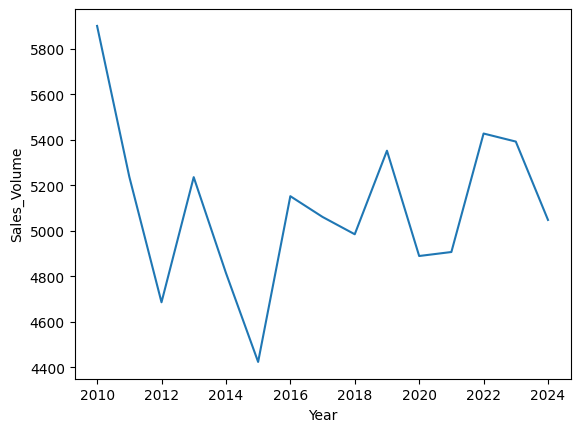

In [90]:

sns.lineplot(asia_i3_df,x="Year",y="Sales_Volume",ci=None)

* Critical sales volume is around 5200.

## year wise trend of i3 model wrt color

/tmp/ipython-input-1537648119.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(asia_i3_df,x="Year",y="Sales_Volume",ci=None,hue="Color", hue_order=["Blue","Black","White","Red","Grey","Silver"])


<Axes: xlabel='Year', ylabel='Sales_Volume'>

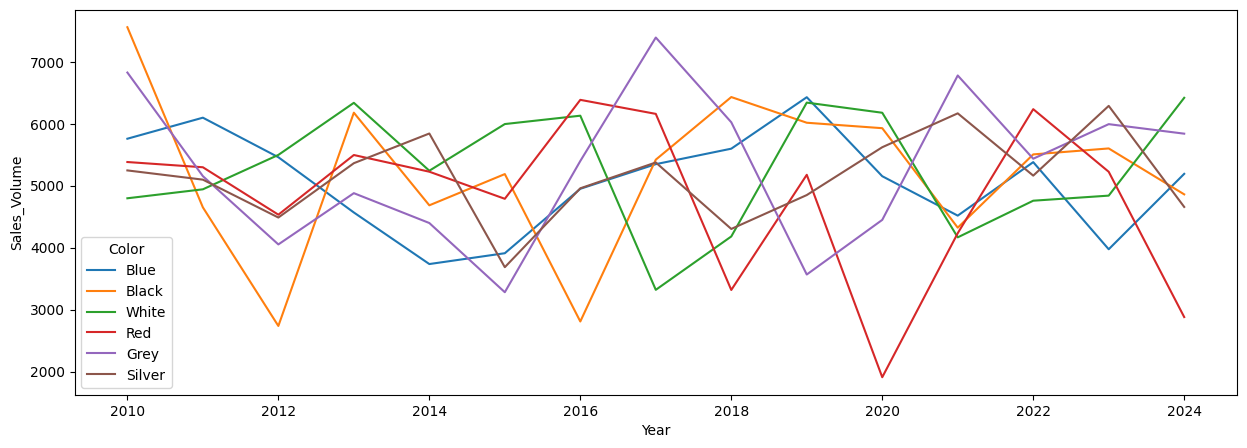

In [95]:

plt.figure(figsize=(15,5))
sns.lineplot(asia_i3_df,x="Year",y="Sales_Volume",ci=None,hue="Color", hue_order=["Blue","Black","White","Red","Grey","Silver"])

**In 2010, 2015,2021 Black or grey colour shows high sales volume. These colour have the potential to attract more customer in future.**

## year wise trend of i3 model wrt transmission

/tmp/ipython-input-547751924.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(asia_i3_df,x="Year",y="Sales_Volume",ci=None,hue="Transmission")


<Axes: xlabel='Year', ylabel='Sales_Volume'>

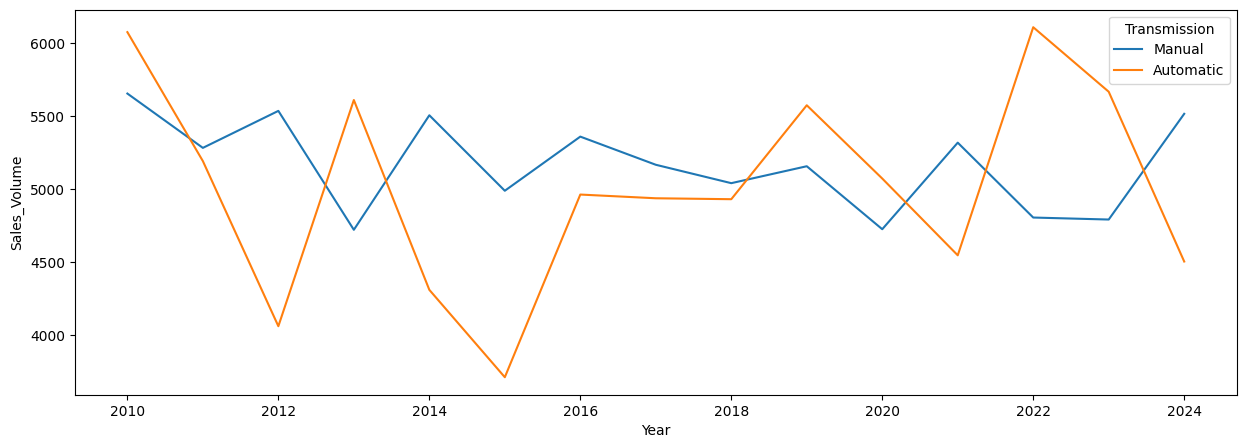

In [97]:

plt.figure(figsize=(15,5))
sns.lineplot(asia_i3_df,x="Year",y="Sales_Volume",ci=None,hue="Transmission")

**Sales volume of i3 model with manual transmission is a constant range 4800 to 5700. On the other hand automatic transmission sales volume is unpredictable some time it is  high Than 6000 and some time low than 3200.**

/tmp/ipython-input-3283337621.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(asia_i3_df,x="Year",y="Sales_Volume",ci=None,hue="Fuel_Type")


<Axes: xlabel='Year', ylabel='Sales_Volume'>

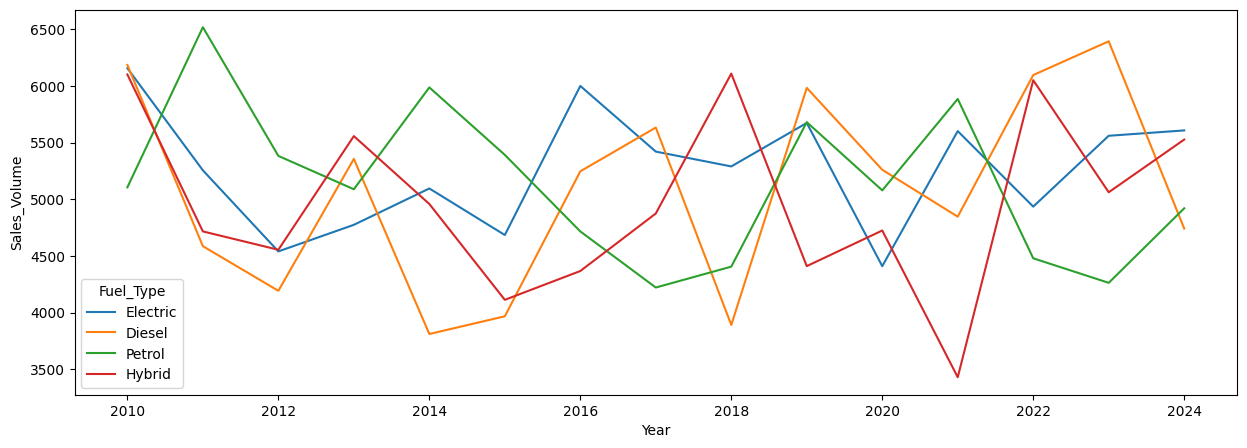

In [107]:
# year wise trend of i3 model wrt Fuel type
plt.figure(figsize=(15,5))
sns.lineplot(asia_i3_df,x="Year",y="Sales_Volume",ci=None,hue="Fuel_Type")

1. Petrol sales volume is low in last 4 year.
2. Electric,desiel car performace is constant.
3. Hybrid car prediction is unpredicted.

# engine_size analysis, year wise trend of i3 model

/tmp/ipython-input-3530172895.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(asia_i3_df[asia_i3_df["Fuel_Type"]=="Hybrid"],x="Year",y="Sales_Volume",ci=None,hue="Engine_Size_L")


<Axes: xlabel='Year', ylabel='Sales_Volume'>

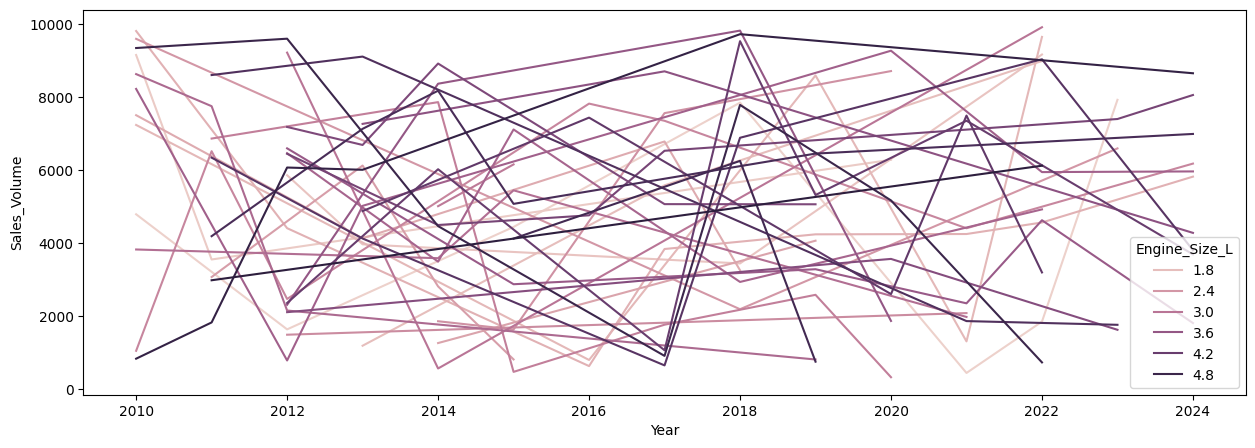

In [100]:

plt.figure(figsize=(15,5))
sns.lineplot(asia_i3_df[asia_i3_df["Fuel_Type"]=="Hybrid"],x="Year",y="Sales_Volume",ci=None,hue="Engine_Size_L")

In [102]:
df["Engine_Size_L"].unique()

array([3.5, 1.6, 4.5, 1.7, 2.1, 1.9, 1.8, 3. , 2.4, 3.8, 2.3, 2.6, 3.1,
       3.7, 4.8, 3.3, 3.2, 2.2, 4.1, 2. , 4.7, 4.3, 4. , 3.6, 4.9, 3.4,
       2.8, 3.9, 1.5, 4.2, 2.5, 2.7, 4.6, 5. , 4.4, 2.9])

In [103]:
# there is too much engine value we will categories them
# if size is less than 1.5 then small engine, if size is between 1.5 to 3 mid size engine , if size greater than 3 big engine.
import numpy as np

# Define conditions
conditions = [
    asia_i3_df["Engine_Size_L"] < 1.5,
    (asia_i3_df["Engine_Size_L"] >= 1.5) & (asia_i3_df["Engine_Size_L"] <= 3),
    asia_i3_df["Engine_Size_L"] > 3
]

# Define corresponding categories
choices = ["small engine", "mid size engine", "big engine"]

# Apply to DataFrame
asia_i3_df["engine_category"] = np.select(conditions, choices, default="unknown")



/tmp/ipython-input-3873240944.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_i3_df["engine_category"] = np.select(conditions, choices, default="unknown")


In [106]:
asia_i3_df["engine_category"].unique()

array(['big engine', 'mid size engine'], dtype=object)

In [ ]:
asia_i3_df

/tmp/ipython-input-3420190980.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(asia_i3_df[asia_i3_df["Fuel_Type"]=="Hybrid"],x="Year",y="Sales_Volume",ci=None,hue="engine_category")


<Axes: xlabel='Year', ylabel='Sales_Volume'>

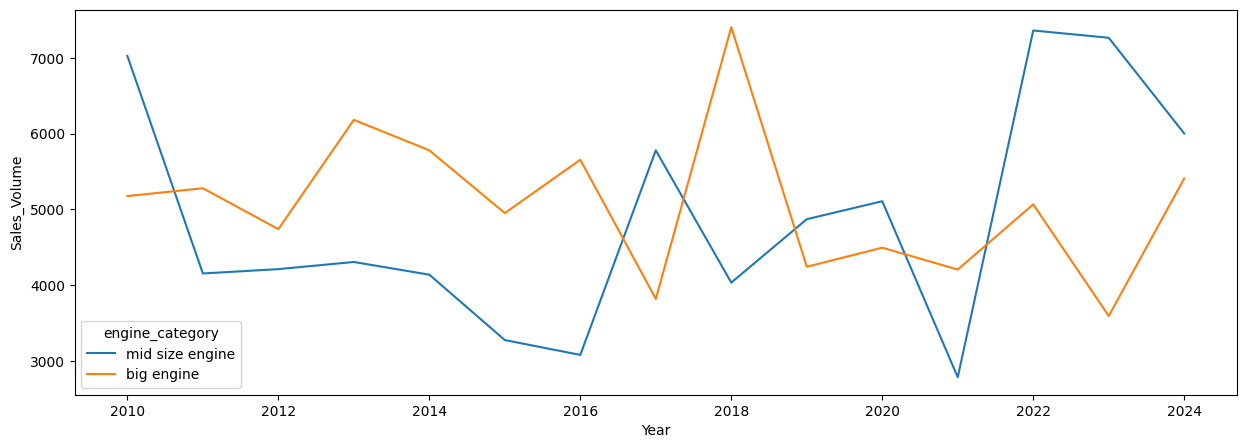

In [105]:
plt.figure(figsize=(15,5))
sns.lineplot(asia_i3_df[asia_i3_df["Fuel_Type"]=="Hybrid"],x="Year",y="Sales_Volume",ci=None,hue="engine_category")

**Mid size engine demand is increased after 2021 and big size engine demand is almost constant.**

# Findings

1. Sales Volume is approximately same is all region.
2. In Asia i3 model has lowest sale.
3. In i3 model in 2010, 2015,2021 Black or grey colour shows high sales volume. These colour have the potential to attract more customer in future.
4. Sales volume of i3 model with manual transmission is a constant range 4800 to 5700. On the other hand automatic transmission sales volume is unpredictable some time it is  high Than 6000 and some time low than 3200.
5. Petrol sales volume is low in last 4 year.
6. Electric,desiel car performace is constant.
7. Hybrid car prediction is unpredicted.

# **Conclusion**

**To boost sales of the BMW i3 model, the company should focus on producing black or grey cars with manual transmission and mid-size engines, while avoiding petrol variants due to their declining demand trend.**